# MetaUtils

* Author: Gen Kuroki
* Date: 2020-10-11～2020-10-17, 2021-03-20～2021-03-26, 2021-06-07
* Repository: https://github.com/genkuroki/MetaUtils.jl
* File: https://nbviewer.jupyter.org/github/genkuroki/MetaUtils.jl/blob/master/MetaUtils.ipynb

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explanatory-examples" data-toc-modified-id="Explanatory-examples-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explanatory examples</a></span></li><li><span><a href="#Miscellaneous-examples-of-@show_texpr,-etc." data-toc-modified-id="Miscellaneous-examples-of-@show_texpr,-etc.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Miscellaneous examples of @show_texpr, etc.</a></span><ul class="toc-item"><li><span><a href="#for-loop" data-toc-modified-id="for-loop-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>for loop</a></span></li><li><span><a href="#subtype-trees" data-toc-modified-id="subtype-trees-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>subtype trees</a></span></li><li><span><a href="#function-definition" data-toc-modified-id="function-definition-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>function definition</a></span></li><li><span><a href="#macro-and-LineNumberNode" data-toc-modified-id="macro-and-LineNumberNode-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>macro and LineNumberNode</a></span></li><li><span><a href="#QuoteNode" data-toc-modified-id="QuoteNode-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>QuoteNode</a></span></li></ul></li><li><span><a href="#Evaluation-of-Lisp-like-tuple-expressions" data-toc-modified-id="Evaluation-of-Lisp-like-tuple-expressions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluation of Lisp-like tuple expressions</a></span></li><li><span><a href="#Plot-example" data-toc-modified-id="Plot-example-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot example</a></span></li><li><span><a href="#Documents" data-toc-modified-id="Documents-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Documents</a></span></li></ul></div>

In [1]:
VERSION

v"1.7.0-DEV.1133"

In [2]:
if isfile("Project.toml")
    using Pkg
    Pkg.activate(".")
    using Revise
end

  Activating project at `C:\Users\genkuroki\OneDrive\work\MetaUtils.jl`


In [3]:
using MetaUtils

## Explanatory examples

In [4]:
@show_sexpr 2x+1

(:call, :+, (:call, :*, 2, :x), 1)

In [5]:
x = 10; (:call, :+, (:call, :*, 2, :x), 1) |> teval

21

In [6]:
@show_tree 2x+1

Expr(:call)
├─ :+
├─ Expr(:call)
│  ├─ :*
│  ├─ 2
│  └─ :x
└─ 1


In [7]:
show_tree(:(2x + 1))

Expr(:call)
├─ :+
├─ Expr(:call)
│  ├─ :*
│  ├─ 2
│  └─ :x
└─ 1


In [8]:
print_subtypes(AbstractRange)

AbstractRange
├─ LinRange
├─ OrdinalRange
│  ├─ AbstractUnitRange
│  │  ├─ Base.IdentityUnitRange
│  │  ├─ Base.OneTo
│  │  ├─ Base.Slice
│  │  └─ UnitRange
│  └─ StepRange
└─ StepRangeLen


In [9]:
show_expr(:(f(x, g(y, z))))

Expr(:call, :f, :x, 
    Expr(:call, :g, :y, :z))

In [10]:
@show_expr 2x+1

Expr(:call, :+, 
    Expr(:call, :*, 2, :x), 1)

In [11]:
x = 10; Expr(:call, :+, 
    Expr(:call, :*, 2, :x), 1) |> eval

21

In [12]:
show_texpr(:(f(x, g(y, z))))

(:call, :f, :x, 
    (:call, :g, :y, :z))

In [13]:
@show_texpr 2x+1

(:call, :+, 
    (:call, :*, 2, :x), 1)

In [14]:
x = 10; (:call, :+, 
    (:call, :*, 2, :x), 1) |> teval

21

In [15]:
texpr2expr((:call, :sin, (:call, :/, π, 6)))

:(sin(π / 6))

In [16]:
(:call, :sin, (:call, :/, π, 6)) |> teval

0.49999999999999994

In [17]:
@teval (:call, :sin, (:call, :/, π, 6))

0.49999999999999994

In [18]:
MetaUtils.@t (:call, :sin, (:call, :/, π, 6))

:(sin(π / 6))
→ 0.49999999999999994


In [19]:
MetaUtils.@T (:call, :sin, (:call, :/, π, 6))

(:call, :sin, (:call, :/, π, 6))
→ (:call, :sin, 
    (:call, :/, π, 6))
→ :(sin(π / 6))
→ 0.49999999999999994


In [20]:
(:sin, (:/, π, 6)) |> teval

0.49999999999999994

In [21]:
@teval (:sin, (:/, π, 6))

0.49999999999999994

In [22]:
MetaUtils.@t (:sin, (:/, π, 6))

:(sin(π / 6))
→ 0.49999999999999994


In [23]:
MetaUtils.@T (:sin, (:/, π, 6))

(:sin, (:/, π, 6))
→ (:call, :sin, 
    (:call, :/, π, 6))
→ :(sin(π / 6))
→ 0.49999999999999994


## Miscellaneous examples of @show_texpr, etc.

### for loop

In [24]:
@show_texpr for k in 1:10
    x = k*(k+1) ÷ 2
    println("k(k+1)/2 = ", x)
end

(:for, 
    (:(=), :k, 
        (:call, :(:), 1, 10)), 
    (:block, 
        (:(=), :x, 
            (:call, :÷, 
                (:call, :*, :k, 
                    (:call, :+, :k, 1)), 2)), 
        (:call, :println, "k(k+1)/2 = ", :x)))

In [25]:
@show_texpr for k in 1:10
    x = k*(k+1) ÷ 2
    println("k(k+1)/2 = ", x)
end true

(:for, 
    (:(=), :k, 
        (:call, :(:), 1, 10)), 
    (:block, LineNumberNode(2, Symbol("In[25]")), 
        (:(=), :x, 
            (:call, :÷, 
                (:call, :*, :k, 
                    (:call, :+, :k, 1)), 2)), LineNumberNode(3, Symbol("In[25]")), 
        (:call, :println, "k(k+1)/2 = ", :x)))

In [26]:
@show_tree for k in 1:10
    x = k*(k+1) ÷ 2
    println("k(k+1)/2 = ", x)
end 2

Expr(:for)
├─ Expr(:(=))
│  ├─ :k
│  └─ Expr(:call)
│     ⋮
│     
└─ Expr(:block)
   ├─ Expr(:(=))
   │  ⋮
   │  
   └─ Expr(:call)
      ⋮
      


In [27]:
@show_tree for k in 1:10
    x = k*(k+1) ÷ 2
    println("k(k+1)/2 = ", x)
end

Expr(:for)
├─ Expr(:(=))
│  ├─ :k
│  └─ Expr(:call)
│     ├─ :(:)
│     ├─ 1
│     └─ 10
└─ Expr(:block)
   ├─ Expr(:(=))
   │  ├─ :x
   │  └─ Expr(:call)
   │     ├─ :÷
   │     ├─ Expr(:call)
   │     │  ├─ :*
   │     │  ├─ :k
   │     │  └─ Expr(:call)
   │     │     ├─ :+
   │     │     ├─ :k
   │     │     └─ 1
   │     └─ 2
   └─ Expr(:call)
      ├─ :println
      ├─ "k(k+1)/2 = "
      └─ :x


In [28]:
@show_tree for k in 1:10
    x = k*(k+1) ÷ 2
    println("k(k+1)/2 = ", x)
end 10 true

Expr(:for)
├─ Expr(:(=))
│  ├─ :k
│  └─ Expr(:call)
│     ├─ :(:)
│     ├─ 1
│     └─ 10
└─ Expr(:block)
   ├─ :(#= In[28]:2 =#)
   ├─ Expr(:(=))
   │  ├─ :x
   │  └─ Expr(:call)
   │     ├─ :÷
   │     ├─ Expr(:call)
   │     │  ├─ :*
   │     │  ├─ :k
   │     │  └─ Expr(:call)
   │     │     ├─ :+
   │     │     ├─ :k
   │     │     └─ 1
   │     └─ 2
   ├─ :(#= In[28]:3 =#)
   └─ Expr(:call)
      ├─ :println
      ├─ "k(k+1)/2 = "
      └─ :x


In [29]:
Meta.@dump for k in 1:10
    x = k*(k+1) ÷ 2
    println("k(k+1)/2 = ", x)
end

Expr
  head: Symbol for
  args: Array{Any}((2,))
    1: Expr
      head: Symbol =
      args: Array{Any}((2,))
        1: Symbol k
        2: Expr
          head: Symbol call
          args: Array{Any}((3,))
            1: Symbol :
            2: Int64 1
            3: Int64 10
    2: Expr
      head: Symbol block
      args: Array{Any}((4,))
        1: LineNumberNode
          line: Int64 2
          file: Symbol In[29]
        2: Expr
          head: Symbol =
          args: Array{Any}((2,))
            1: Symbol x
            2: Expr
              head: Symbol call
              args: Array{Any}((3,))
                1: Symbol ÷
                2: Expr
                3: Int64 2
        3: LineNumberNode
          line: Int64 3
          file: Symbol In[29]
        4: Expr
          head: Symbol call
          args: Array{Any}((3,))
            1: Symbol println
            2: String "k(k+1)/2 = "
            3: Symbol x


In [30]:
@show_expr for k in 1:10
    x = k*(k+1) ÷ 2
    println("k(k+1)/2 = ", x)
end

Expr(:for, 
    Expr(:(=), :k, 
        Expr(:call, :(:), 1, 10)), 
    Expr(:block, 
        Expr(:(=), :x, 
            Expr(:call, :÷, 
                Expr(:call, :*, :k, 
                    Expr(:call, :+, :k, 1)), 2)), 
        Expr(:call, :println, "k(k+1)/2 = ", :x)))

In [31]:
@show_texpr for k in 1:10
    x = k*(k+1) ÷ 2
    println("k(k+1)/2 = ", x)
end

(:for, 
    (:(=), :k, 
        (:call, :(:), 1, 10)), 
    (:block, 
        (:(=), :x, 
            (:call, :÷, 
                (:call, :*, :k, 
                    (:call, :+, :k, 1)), 2)), 
        (:call, :println, "k(k+1)/2 = ", :x)))

### subtype trees

In [32]:
print_subtypes(AbstractRange)

AbstractRange
├─ LinRange
├─ OrdinalRange
│  ├─ AbstractUnitRange
│  │  ├─ Base.IdentityUnitRange
│  │  ├─ Base.OneTo
│  │  ├─ Base.Slice
│  │  └─ UnitRange
│  └─ StepRange
└─ StepRangeLen


In [33]:
print_subtypes(Number)

Number
├─ Complex
└─ Real
   ├─ AbstractFloat
   │  ├─ BigFloat
   │  ├─ Float16
   │  ├─ Float32
   │  └─ Float64
   ├─ AbstractIrrational
   │  └─ Irrational
   ├─ Integer
   │  ├─ Bool
   │  ├─ Signed
   │  │  ├─ BigInt
   │  │  ├─ Int128
   │  │  ├─ Int16
   │  │  ├─ Int32
   │  │  ├─ Int64
   │  │  └─ Int8
   │  └─ Unsigned
   │     ├─ UInt128
   │     ├─ UInt16
   │     ├─ UInt32
   │     ├─ UInt64
   │     └─ UInt8
   └─ Rational


In [34]:
print_subtypes(AbstractVector)

AbstractVector
├─ AbstractRange
│  ├─ LinRange
│  ├─ OrdinalRange
│  │  ├─ AbstractUnitRange
│  │  │  ├─ Base.IdentityUnitRange
│  │  │  ├─ Base.OneTo
│  │  │  ├─ Base.Slice
│  │  │  └─ UnitRange
│  │  └─ StepRange
│  └─ StepRangeLen
├─ Base.ExceptionStack
├─ Base.LogicalIndex
├─ Base.MethodList
├─ Base.ReinterpretArray{T, 1, S, A} where {T, S, A<:(AbstractArray{S})}
├─ Base.ReshapedArray{T, 1} where T
├─ BitVector
├─ CartesianIndices{1, R} where R<:Tuple{OrdinalRange{Int64, Int64}}
├─ Core.Compiler.AbstractRange
│  ├─ Core.Compiler.LinRange
│  ├─ Core.Compiler.OrdinalRange
│  │  ├─ Core.Compiler.AbstractUnitRange
│  │  │  ├─ Core.Compiler.IdentityUnitRange
│  │  │  ├─ Core.Compiler.OneTo
│  │  │  ├─ Core.Compiler.Slice
│  │  │  ├─ Core.Compiler.StmtRange
│  │  │  └─ Core.Compiler.UnitRange
│  │  └─ Core.Compiler.StepRange
│  └─ Core.Compiler.StepRangeLen
├─ Core.Compiler.BitArray{1}
├─ Core.Compiler.ExceptionStack
├─ Core.Compiler.LinearIndices{1, R} where R<:Tuple{Core.Compiler.Abstr

### function definition

In [35]:
@show_texpr function f(x::T) where T<:Number
    sin(x)
end

(:function, 
    (:where, 
        (:call, :f, 
            (:(::), :x, :T)), 
        (:<:, :T, :Number)), 
    (:block, 
        (:call, :sin, :x)))

In [36]:
@show_tree function f(x::T) where T<:Number
    sin(x)
end

Expr(:function)
├─ Expr(:where)
│  ├─ Expr(:call)
│  │  ├─ :f
│  │  └─ Expr(:(::))
│  │     ├─ :x
│  │     └─ :T
│  └─ Expr(:<:)
│     ├─ :T
│     └─ :Number
└─ Expr(:block)
   └─ Expr(:call)
      ├─ :sin
      └─ :x


In [37]:
@show_expr function f(x::T) where T<:Number
    sin(x)
end

Expr(:function, 
    Expr(:where, 
        Expr(:call, :f, 
            Expr(:(::), :x, :T)), 
        Expr(:<:, :T, :Number)), 
    Expr(:block, 
        Expr(:call, :sin, :x)))

In [38]:
@show_texpr function f(x::T) where T<:Number
    sin(x)
end

(:function, 
    (:where, 
        (:call, :f, 
            (:(::), :x, :T)), 
        (:<:, :T, :Number)), 
    (:block, 
        (:call, :sin, :x)))

### macro and LineNumberNode

In [39]:
@show_tree @show float(π)

Expr(:macrocall)
├─ Symbol("@show")
├─ :(#= In[39]:1 =#)
└─ Expr(:call)
   ├─ :float
   └─ :π


In [40]:
@show_sexpr @show float(π)

(:macrocall, Symbol("@show"), :(#= In[40]:1 =#), (:call, :float, :π))

In [41]:
@teval (:macrocall, Symbol("@show"), :(#= In[34]:1 =#), (:call, :float, :π))

float(π) = 3.141592653589793


3.141592653589793

In [42]:
@show_expr @show float(π)

Expr(:macrocall, Symbol("@show"), LineNumberNode(1, Symbol("In[42]")), 
    Expr(:call, :float, :π))

In [43]:
Expr(:macrocall, Symbol("@show"), LineNumberNode(@__LINE__, @__FILE__), 
    Expr(:call, :float, :π)) |> show_expr

Expr(:macrocall, Symbol("@show"), LineNumberNode(1, Symbol("In[43]")), 
    Expr(:call, :float, :π))

In [44]:
Expr(:macrocall, Symbol("@show"), LineNumberNode(@__LINE__, @__FILE__), 
    Expr(:call, :float, :π)) |> eval

float(π) = 3.141592653589793


3.141592653589793

In [45]:
@show_texpr @show float(π)

(:macrocall, Symbol("@show"), LineNumberNode(1, Symbol("In[45]")), 
    (:call, :float, :π))

In [46]:
(:macrocall, Symbol("@show"), LineNumberNode(@__LINE__, @__FILE__), 
    (:call, :float, :π)) |> teval

float(π) = 3.141592653589793


3.141592653589793

In [47]:
@teval (:macrocall, Symbol("@show"), LineNumberNode(@__LINE__, @__FILE__),  
    (:call, :float, :π))

float(π) = 3.141592653589793


3.141592653589793

### QuoteNode

In [48]:
QuoteNode(:(sin(x)))

:($(QuoteNode(:(sin(x)))))

In [49]:
QuoteNode(:(sin(x))) |> Meta.show_sexpr

(:quote, #QuoteNode
  (:call, :sin, :x)
)

In [50]:
QuoteNode(:(sin(x))) |> show_expr

QuoteNode(
    Expr(:call, :sin, :x))

In [51]:
QuoteNode(:(sin(x))) |> show_texpr

QuoteNode(
    (:call, :sin, :x))

In [52]:
QuoteNode(
    (:call, :sin, :x)) |> texpr2expr == QuoteNode(:(sin(x)))

true

In [53]:
@teval QuoteNode(
    (:call, :sin, :x))

:(sin(x))

## Evaluation of Lisp-like tuple expressions

If you want more Lisp-like examamples, see [LispLikeEval.ipynb](https://nbviewer.jupyter.org/github/genkuroki/LispLikeEval.jl/blob/master/LispLikeEval.ipynb).

In [54]:
using MetaUtils: @t, @T

In [55]:
# Define and run a function f(x) = sin(x)

@t (:(=), :(f(x)), (:sin, :x))
println()
@t (:f, (:/, π, 6))

:(f(x) = sin(x))
→ f

:(f(π / 6))
→ 0.49999999999999994


In [56]:
# Define and run a function f(x) = sin(x)

@T (:(=), :(f(x)), (:sin, :x))
println()
@T (:f, (:/, π, 6))

(:(=), :(f(x)), (:sin, :x))
→ (:(=), 
    (:call, :f, :x), 
    (:call, :sin, :x))
→ :(f(x) = sin(x))
→ f

(:f, (:/, π, 6))
→ (:call, :f, 
    (:call, :/, π, 6))
→ :(f(π / 6))
→ 0.49999999999999994


In [57]:
# Define and run a function g(x) = sin(x)

@t (:block,
    (:function, :(g(x)), (:sin, :x)),
    (:call, :g, (:/, π, 6)))

quote
    function g(x)
        sin(x)
    end
    g(π / 6)
end
→ 0.49999999999999994


In [58]:
# Define and run a function g(x) = sin(x)

@T (:block,
    (:function, :(g(x)), (:sin, :x)),
    (:call, :g, (:/, π, 6)))

(:block, (:function, :(g(x)), (:sin, :x)), (:call, :g, (:/, π, 6)))
→ (:block, 
    (:function, 
        (:call, :g, :x), 
        (:call, :sin, :x)), 
    (:call, :g, 
        (:call, :/, π, 6)))
→ quote
    function g(x)
        sin(x)
    end
    g(π / 6)
end
→ 0.49999999999999994


In [59]:
# Calculation of pi by the Monte Carlo method

@t (:block, 
    (:function, :(pi_mc(N)), 
        (:block, 
            (:(=), :c, 0), 
            (:for, (:(=), :i, (:(:), 1, :N)), 
                (:block, 
                    (:+=, :c, 
                        (:call, :ifelse, 
                            (:≤, (:+, (:^, (:rand,), 2), (:^, (:rand,), 2)), 1), 
                            1, 0)))), 
            (:/, (:*, 4, :c), :N))), 
    (:call, :pi_mc, (:^, 10, 8)))

quote
    function pi_mc(N)
        c = 0
        for i = 1:N
            c += ifelse(rand() ^ 2 + rand() ^ 2 ≤ 1, 1, 0)
        end
        (4c) / N
    end
    pi_mc(10 ^ 8)
end
→ 3.14178092


In [60]:
# quote

@t (:quote, (:sin, :x))

:($(Expr(:quote, :(sin(x)))))
→ :(sin(x))


In [61]:
# tuple

@t (:tuple, 1, 2, 3)

:((1, 2, 3))
→ (1, 2, 3)


## Plot example

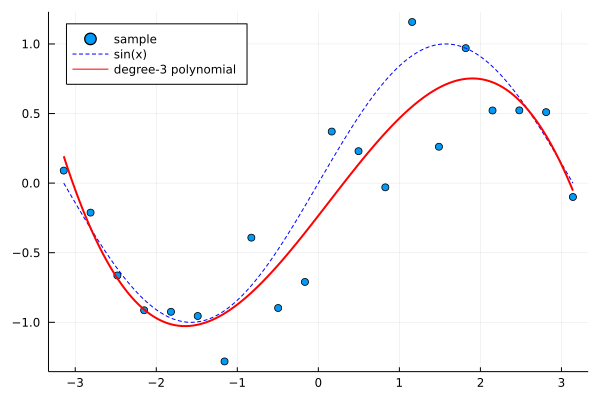

In [62]:
begin
    using Plots
    n = 20
    x = range(-π, π; length=20)
    noise = 0.3randn(n)
    y = sin.(x) + noise
    X = x .^ (0:3)'
    b = X\y
    f(x) = evalpoly(x, b)
    xs = range(-π, π; length=400)
    plot(; legend=:topleft)
    scatter!(x, y; label="sample")
    plot!(xs, sin.(xs); label="sin(x)", color=:blue, ls=:dash)
    plot!(xs, f.(xs); label="degree-3 polynomial", color=:red, lw=2)
end

In [63]:
@show_texpr begin
    using Plots
    n = 20
    x = range(-π, π; length=20)
    noise = 0.3randn(n)
    y = sin.(x) + noise
    X = x .^ (0:3)'
    b = X\y
    f(x) = evalpoly(x, b)
    xs = range(-π, π; length=400)
    plot(; legend=:topleft)
    scatter!(x, y; label="sample")
    plot!(xs, sin.(xs); label="sin(x)", color=:blue, ls=:dash)
    plot!(xs, f.(xs); label="degree-3 polynomial", color=:red, lw=2)
end

(:block, 
    (:using, 
        (:., :Plots)), 
    (:(=), :n, 20), 
    (:(=), :x, 
        (:call, :range, 
            (:parameters, 
                (:kw, :length, 20)), 
            (:call, :-, :π), :π)), 
    (:(=), :noise, 
        (:call, :*, 0.3, 
            (:call, :randn, :n))), 
    (:(=), :y, 
        (:call, :+, 
            (:., :sin, 
                (:tuple, :x)), :noise)), 
    (:(=), :X, 
        (:call, :.^, :x, 
            (Symbol("'"), 
                (:call, :(:), 0, 3)))), 
    (:(=), :b, 
        (:call, :\, :X, :y)), 
    (:(=), 
        (:call, :f, :x), 
        (:block, 
            (:call, :evalpoly, :x, :b))), 
    (:(=), :xs, 
        (:call, :range, 
            (:parameters, 
                (:kw, :length, 400)), 
            (:call, :-, :π), :π)), 
    (:call, :plot, 
        (:parameters, 
            (:kw, :legend, QuoteNode(:topleft)))), 
    (:call, :scatter!, 
        (:parameters, 
            (:kw, :label, "sample")), :x, :y), 
    (:call, :p

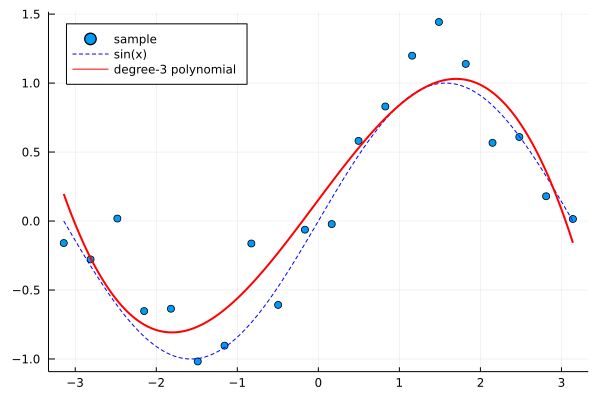

In [64]:
@teval (:block, 
    (:using, (:., :Plots)), 
    (:(=), :n, 20), 
    (:(=), :x, (:range, (:parameters, (:kw, :length, 20)), (:-, :π), :π)), 
    (:(=), :noise, (:*, 0.3, (:randn, :n))), 
    (:(=), :y, (:+, (:., :sin, (:tuple, :x)), :noise)), 
    (:(=), :X, (:call, :.^, :x, (Symbol("'"), (:call, :(:), 0, 3)))),  
    (:(=), :b, (:\, :X, :y)), 
    (:(=), (:call, :f, :x), (:block, (:call, :evalpoly, :x, :b))),
    (:(=), :xs, (:range, (:parameters, (:kw, :length, 400)), (:-, :π), :π)), 
    (:plot, (:parameters, (:kw, :legend, QuoteNode(:topleft)))), 
    (:scatter!, (:parameters, (:kw, :label, "sample")), :x, :y), 
    (:plot!, (:parameters, 
            (:kw, :label, "sin(x)"), 
            (:kw, :color, QuoteNode(:blue)), 
            (:kw, :ls, QuoteNode(:dash))), 
        :xs, (:., :sin, (:tuple, :xs))), 
    (:plot!, (:parameters, 
            (:kw, :label, "degree-3 polynomial"), 
            (:kw, :color, QuoteNode(:red)), 
            (:kw, :lw, 2)), 
        :xs, (:., :f, (:tuple, :xs))))

In [65]:
(:block, 
    (:using, (:., :Plots)), 
    (:(=), :n, 20), 
    (:(=), :x, (:range, (:parameters, (:kw, :length, 20)), (:-, :π), :π)), 
    (:(=), :noise, (:*, 0.3, (:randn, :n))), 
    (:(=), :y, (:+, (:., :sin, (:tuple, :x)), :noise)), 
    (:(=), :X, (:call, :.^, :x, (Symbol("'"), (:call, :(:), 0, 3)))),  
    (:(=), :b, (:\, :X, :y)), 
    (:(=), (:call, :f, :x), (:block, (:call, :evalpoly, :x, :b))),
    (:(=), :xs, (:range, (:parameters, (:kw, :length, 400)), (:-, :π), :π)), 
    (:plot, (:parameters, (:kw, :legend, QuoteNode(:topleft)))), 
    (:scatter!, (:parameters, (:kw, :label, "sample")), :x, :y), 
    (:plot!, (:parameters, 
            (:kw, :label, "sin(x)"), 
            (:kw, :color, QuoteNode(:blue)), 
            (:kw, :ls, QuoteNode(:dash))), 
        :xs, (:., :sin, (:tuple, :xs))), 
    (:plot!, (:parameters, 
            (:kw, :label, "degree-3 polynomial"), 
            (:kw, :color, QuoteNode(:red)), 
            (:kw, :lw, 2)), 
        :xs, (:., :f, (:tuple, :xs)))) |> texpr2expr |> 
x -> display("text/markdown", "```julia\n$x\n```")

```julia
begin
    using Plots
    n = 20
    x = range(-π, π; length = 20)
    noise = 0.3 * randn(n)
    y = sin.(x) + noise
    X = x .^ var"'"(0:3)
    b = X \ y
    f(x) = begin
            evalpoly(x, b)
        end
    xs = range(-π, π; length = 400)
    plot(; legend = :topleft)
    scatter!(x, y; label = "sample")
    plot!(xs, sin.(xs); label = "sin(x)", color = :blue, ls = :dash)
    plot!(xs, f.(xs); label = "degree-3 polynomial", color = :red, lw = 2)
end
```

## Documents

In [66]:
@doc MetaUtils

```
MetaUtils
```

contains utilities for metaprogramming in Julia.

```julia
export @show_sexpr, 
    show_tree, @show_tree, 
    print_subtypes, 
    show_expr, @show_expr, 
    show_texpr, @show_texpr, 
    texpr2expr, teval, @teval
```


In [67]:
@doc @show_sexpr

```
@show_sexpr(expr, linenums=false)
```

shows the lisp style S-expression of `expr` and prints the line number nodes if `linenums` is true.  This is the macro version of `Meta.show_sexpr`.

## Example

```julia
julia> @show_sexpr 2x+1
(:call, :+, (:call, :*, 2, :x), 1)
```

`teval` function can evaluate the output of `@show_sexpr`. 

```julia
julia> x = 10; (:call, :+, (:call, :*, 2, :x), 1) |> teval
21
```


In [68]:
@doc @show_tree

```
@show_tree(expr, maxdepth=10, linenums=false)
```

shows the tree form of the expression `expr` with maxdepth and prints the line number nodes if `linenums` is true.

## Example

```julia
julia> @show_tree 2x+1
Expr(:call)
├─ :+
├─ Expr(:call)
│  ├─ :*
│  ├─ 2
│  └─ :x
└─ 1
```


In [69]:
@doc show_tree

```
show_tree(expr) = AbstractTrees.print_tree(expr)
```

can be regarded as the function version of `@show_tree`.


In [70]:
@doc print_subtypes

```
print_subtypes(T::Type; kwargs...)
print_subtypes(io::IO, T::Type; kwargs...)
print_subtypes(f, io::IO, T::Type; kwargs...)
```

prints the subtypes of `T` by `AbstractTrees.print_tree`.

## Example

```julia
julia> print_subtypes(AbstractRange)
AbstractRange
├─ LinRange
├─ OrdinalRange
│  ├─ AbstractUnitRange
│  │  ├─ Base.IdentityUnitRange
│  │  ├─ Base.OneTo
│  │  ├─ Base.Slice
│  │  └─ UnitRange
│  └─ StepRange
└─ StepRangeLen
```


In [71]:
@doc show_expr

```
show_expr([io::IO,], ex)
```

shows expression `ex` as a Julia style expression.

# Examples

```julia
julia> show_expr(:(f(x, g(y, z))))
Expr(:call, :f, :x, 
    Expr(:call, :g, :y, :z))
```


In [72]:
@doc @show_expr

```
@show_expr(expr, linenums=false)
```

shows the Juia style expression of `expr` and prints the line number nodes if `linenums` is true.  This is the macro version of `show_expr`.

## Example

```julia
julia> @show_expr 2x+1
Expr(:call, :+, 
    Expr(:call, :*, 2, :x), 1)
```

`eval` function can evaluate the output of `@show_expr`. 

```julia
julia> x = 10; Expr(:call, :+, 
    Expr(:call, :*, 2, :x), 1) |> eval
21
```


In [73]:
@doc show_texpr

```
show_texpr([io::IO,], ex)
```

Yet another `Meta.show_sexpr`.  It shows expression `ex` as a lisp style expression.

Remark: The indentation is different from `Meta.show_sexpr`.

# Examples

```julia
julia> show_texpr(:(f(x, g(y, z))))
Expr(:call, :f, :x, 
    Expr(:call, :g, :y, :z))
```


In [74]:
@doc @show_texpr

```
@show_texpr(expr, linenums=false)
```

Yet another `@show_sexpr`.  It shows the lisp style S-expression of `expr` and prints the line number nodes if `linenums` is true.

Remark: The indentation is different from `@show_sexpr`.

## Example

```julia
julia> @show_texpr 2x+1
(:call, :+, 
    (:call, :*, 2, :x), 1)
```

`teval` function can evaluate the output of `@show_texpr`.

```julia
julia> x = 10; (:call, :+, 
    (:call, :*, 2, :x), 1) |> teval
21
```


In [75]:
@doc teval

```
teval(texpr, m::Module=Main)
```

evaluates the lisp-like tuple expression `texpr`.

Example: Calculation of `sin(π/6)`

```julia
julia> (:call, :sin, (:call, :/, π, 6)) |> teval
0.49999999999999994
```

In some cases, you can omit `:call`.

```julia
julia> (:sin, (:/, π, 6)) |> teval
0.49999999999999994
```


In [76]:
@doc @teval

```
@teval texpr
```

evaluates the lisp-like tuple expression `texpr`.

Example: Calculation of `sin(π/6)`

```julia
julia> @teval (:call, :sin, (:call, :/, π, 6))
0.49999999999999994
```

In some cases, you can omit `:call`.

```julia
julia> @teval (:sin, (:/, π, 6))
0.49999999999999994
```


In [77]:
@doc MetaUtils.@t

```
MetaUtils.@t texpr
```

shows the Julia expression and the value of the lisp-like tuple expression `texpr`.

Example:

```julia
julia> MetaUtils.@t (:call, :sin, (:call, :/, π, 6))
:(sin(π / 6))
→ 0.49999999999999994
```


In [78]:
@doc MetaUtils.@T

```
MetaUtils.@T texpr
```

shows `show(texpr)`, `show_texpr(texpr)`, the Julia expression, and the value of the lisp-like tuple expression `texpr`.

Example:

```julia
julia> MetaUtils.@T (:call, :sin, (:call, :/, π, 6))
(:call, :sin, (:call, :/, π, 6))
→ (:call, :sin, 
    (:call, :/, π, 6))
→ :(sin(π / 6))
→ 0.49999999999999994
```
